# Analysis of singles and coincidence events measured with BoxSi p1.3
Prototype 1.3 - 4 SiPMs: 2 on each FEM, from each side of the source holder,
and another SiPM on another FEM arbitrarily positioned in the dark-box for reference

these are actually repeated measurements of proto1 with a more active $^{22}$Na source

last update Nov-1, 2020

In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/analysis/Python'); 
from PETsys_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'

In [2]:
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/'

## singles

In [3]:
# dT_Na22 = 1800 + 3600
# Na22_singles_1 = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC/Na22_source_1800sec_single.dat',
#                            delimiter='\t',names=['time','charge','channel'])
# Na22_singles_2 = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC/Na22_source_3600sec_single.dat',
#                            delimiter='\t',names=['time','charge','channel'])
# Na22_singles = pd.concat([Na22_singles_1,Na22_singles_2])

dT_Na22 = 1800
Na22_singles = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC_4Nov2020/Na22_source_%dsec_single.dat'%dT_Na22,
                           delimiter='\t',names=['time','charge','channel'])



dT_Bkg = 1000
Bkg_singles = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC_1Nov2020/no_source_1000sec_single.dat',    
                          delimiter='\t',names=['time','charge','channel'])
Na22_singles[0:3]

,time,charge,channel
0,791185517193,7.439777,21
1,791478195057,4.671875,405
2,791541424940,15.493885,21


In [4]:
channels = np.unique(Na22_singles.channel)
print 'detected events in the following channels: ',channels
Na22singles = dict()
Bkgsingles = dict()
for ch in channels:
    Na22singles[ch] = Na22_singles[Na22_singles.channel==ch]    
    Bkgsingles[ch] = Bkg_singles[Bkg_singles.channel==ch]    
    print 'channel', ch,':',float(len(Bkgsingles[ch]))/dT_Bkg, 'events/sec in bkg, ',float(len(Na22singles[ch]))/dT_Na22,'events/sec in sig+bkg'
print 'done grouping'

detected events in the following channels:  [ 21  98 226 405 482]
channel 21 : 12.793 events/sec in bkg,  144.318888889 events/sec in sig+bkg
channel 98 : 12.844 events/sec in bkg,  38.7705555556 events/sec in sig+bkg
channel 226 : 12.836 events/sec in bkg,  27.8333333333 events/sec in sig+bkg
channel 405 : 13.03 events/sec in bkg,  335.963333333 events/sec in sig+bkg
channel 482 : 12.797 events/sec in bkg,  38.3483333333 events/sec in sig+bkg
done grouping


PETsys_analysis_tools.py:49: RuntimeWarning: invalid value encountered in power
  linearisedQ = P0*(np.power(P1, np.power(Q,P2))) + P3*Q - P0
/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/p1_22Na_singles_QsigBkg.pdf


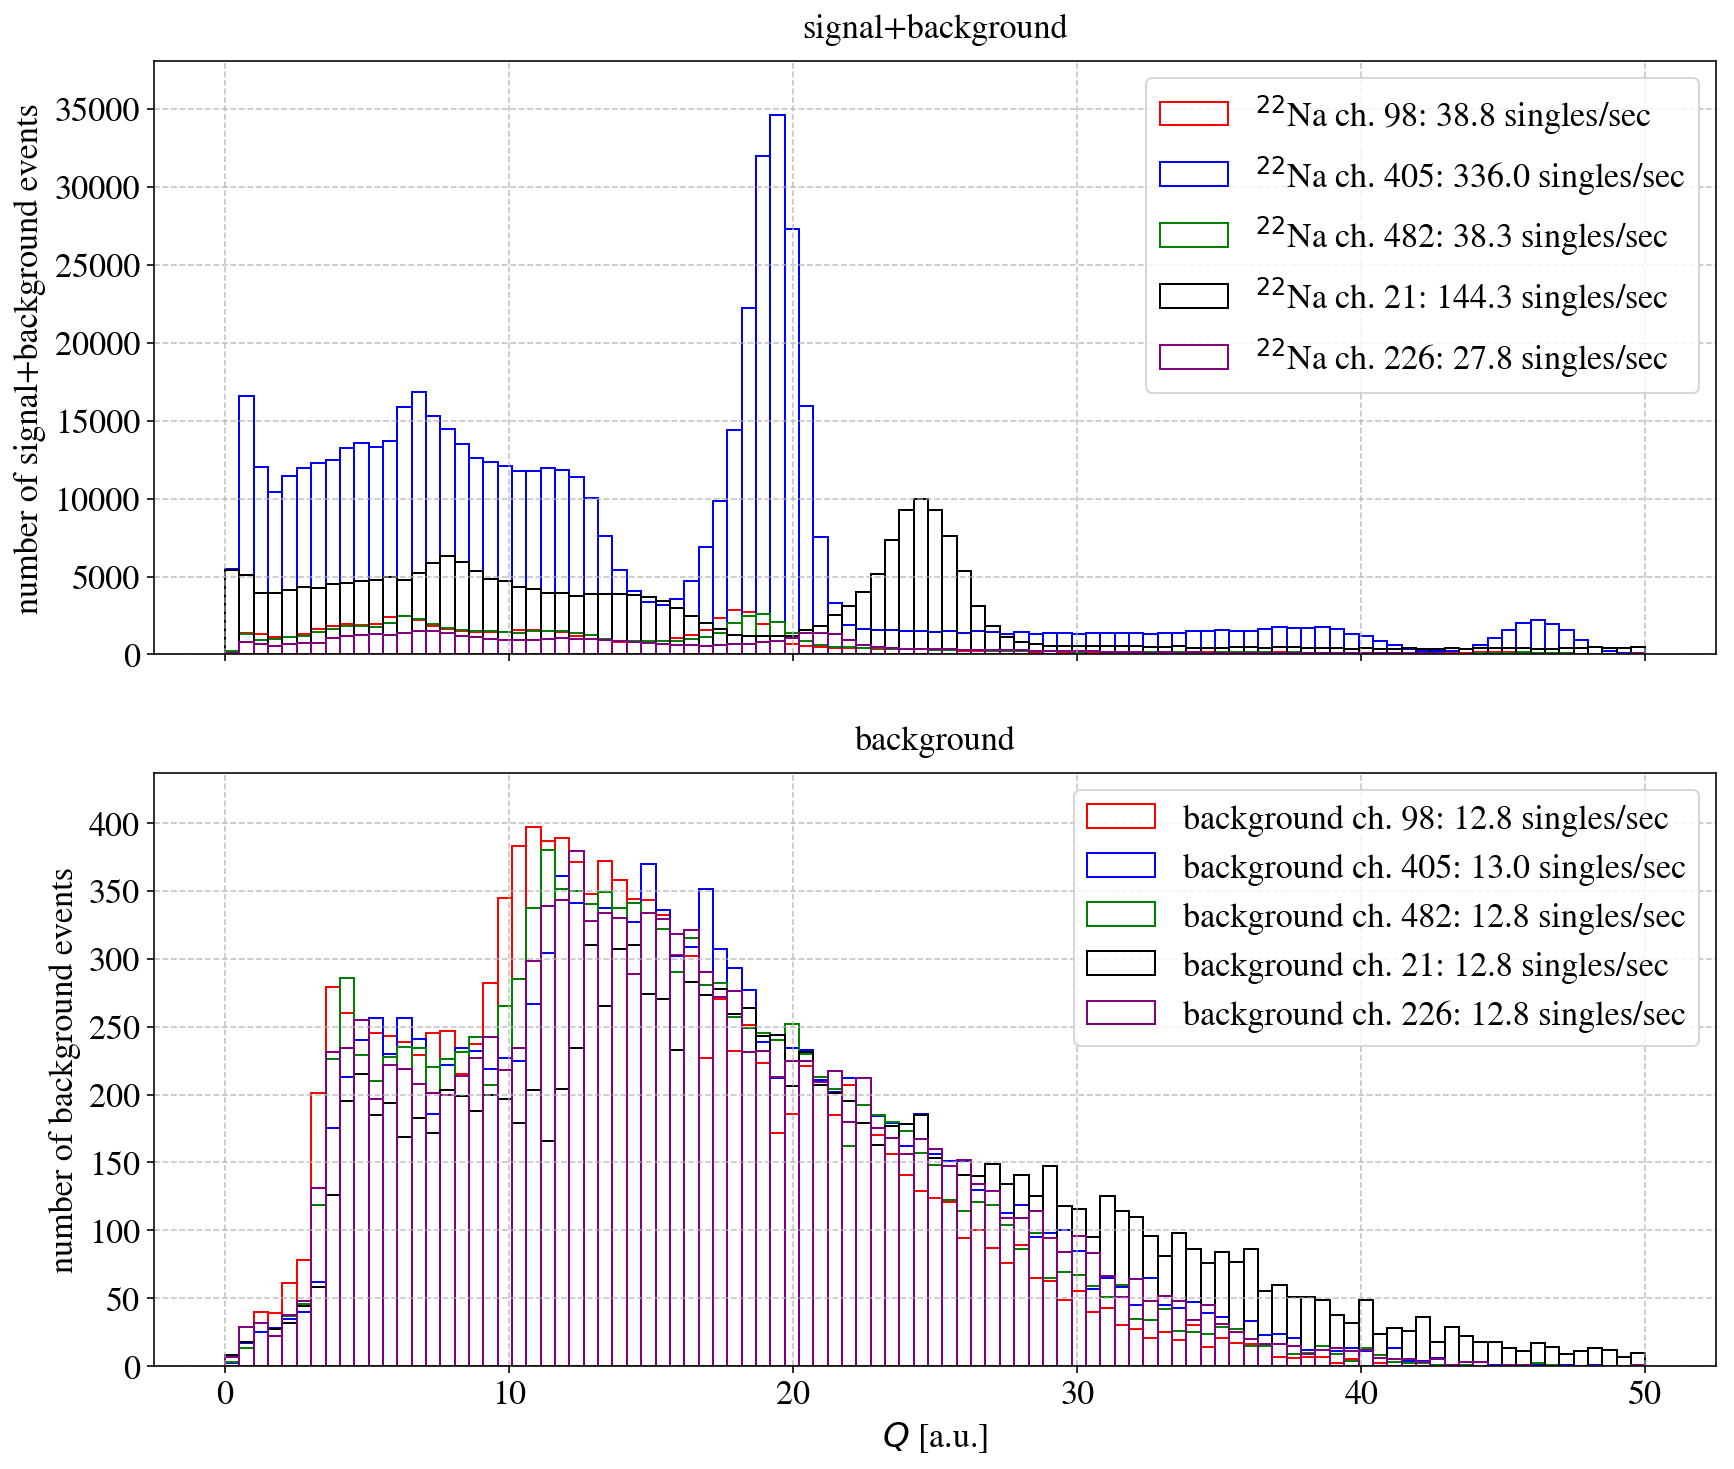

In [5]:
bins=np.linspace(0,50,100)
bin_width = (bins[1]-bins[0])/2
SignalChannels = [98,405,482,21,226];
colors = ['red','blue','green','black','purple']
hSigBkg,hBkg,hSig,hSig_err = dict(),dict(),dict(),dict()
ymax = 0
ymax_bkg = 0
fig=plt.figure(figsize=(14,12));
for ch,color in zip(SignalChannels,colors):
    # signal+backgroud
    SigBkgQ = lineariseChargeDeposited(Na22singles[ch].charge)
    ax=fig.add_subplot(2,1,1)
    hSigBkg[ch],bins,patches = plt.hist(SigBkgQ,bins=bins,edgecolor=color,facecolor='None',
         label='$^{22}$Na ch. %d: %.1f singles/sec'%(ch,float(len(SigBkgQ))/dT_Na22));
    if np.max(hSigBkg[ch])>ymax:
        ymax = np.max(hSigBkg[ch]);
    # backgroud    
    ax=fig.add_subplot(2,1,2)
    BkgQ = lineariseChargeDeposited(Bkgsingles[ch].charge)
    hBkg[ch],bins,patches = plt.hist(BkgQ,bins=bins,edgecolor=color,facecolor='None',
         label='background ch. %d: %.1f singles/sec'%(ch,float(len(BkgQ))/dT_Bkg));
    if np.max(hBkg[ch])>ymax_bkg:
        ymax_bkg = np.max(hBkg[ch]);
    
    # signal
    hSig[ch] = hSigBkg[ch] - hBkg[ch]*(dT_Na22/dT_Bkg)
    hSig_err[ch] = np.sqrt( hSigBkg[ch] + hBkg[ch]*(dT_Na22/dT_Bkg))
    
ax=fig.add_subplot(2,1,1)    
set_axes(ax=ax,x_label='',y_label='number of signal+background events',title='signal+background',
         remove_ticks_x=True,ylim=(0,1.1*ymax),
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='best');

ax=fig.add_subplot(2,1,2)    
set_axes(ax=ax,x_label='$Q$ [a.u.]',y_label='number of background events',title='background',
         ylim=(0,1.1*ymax_bkg),
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='best');
save_figure(filename = main_figures_path + 'p1_22Na_singles_QsigBkg.pdf')

In [6]:
from scipy.optimize import curve_fit
def gaus(x,N,mean,sigma):
       return N*np.exp(-(x-mean)**2/(sigma**2))

Q(511keV): 18.181818181818183
Q(511keV): 19.6969696969697
Q(511keV): 19.191919191919194
Q(511keV): 24.747474747474747
Q(511keV): 7.070707070707071
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/p1_22Na_singles_DeltaQ.pdf


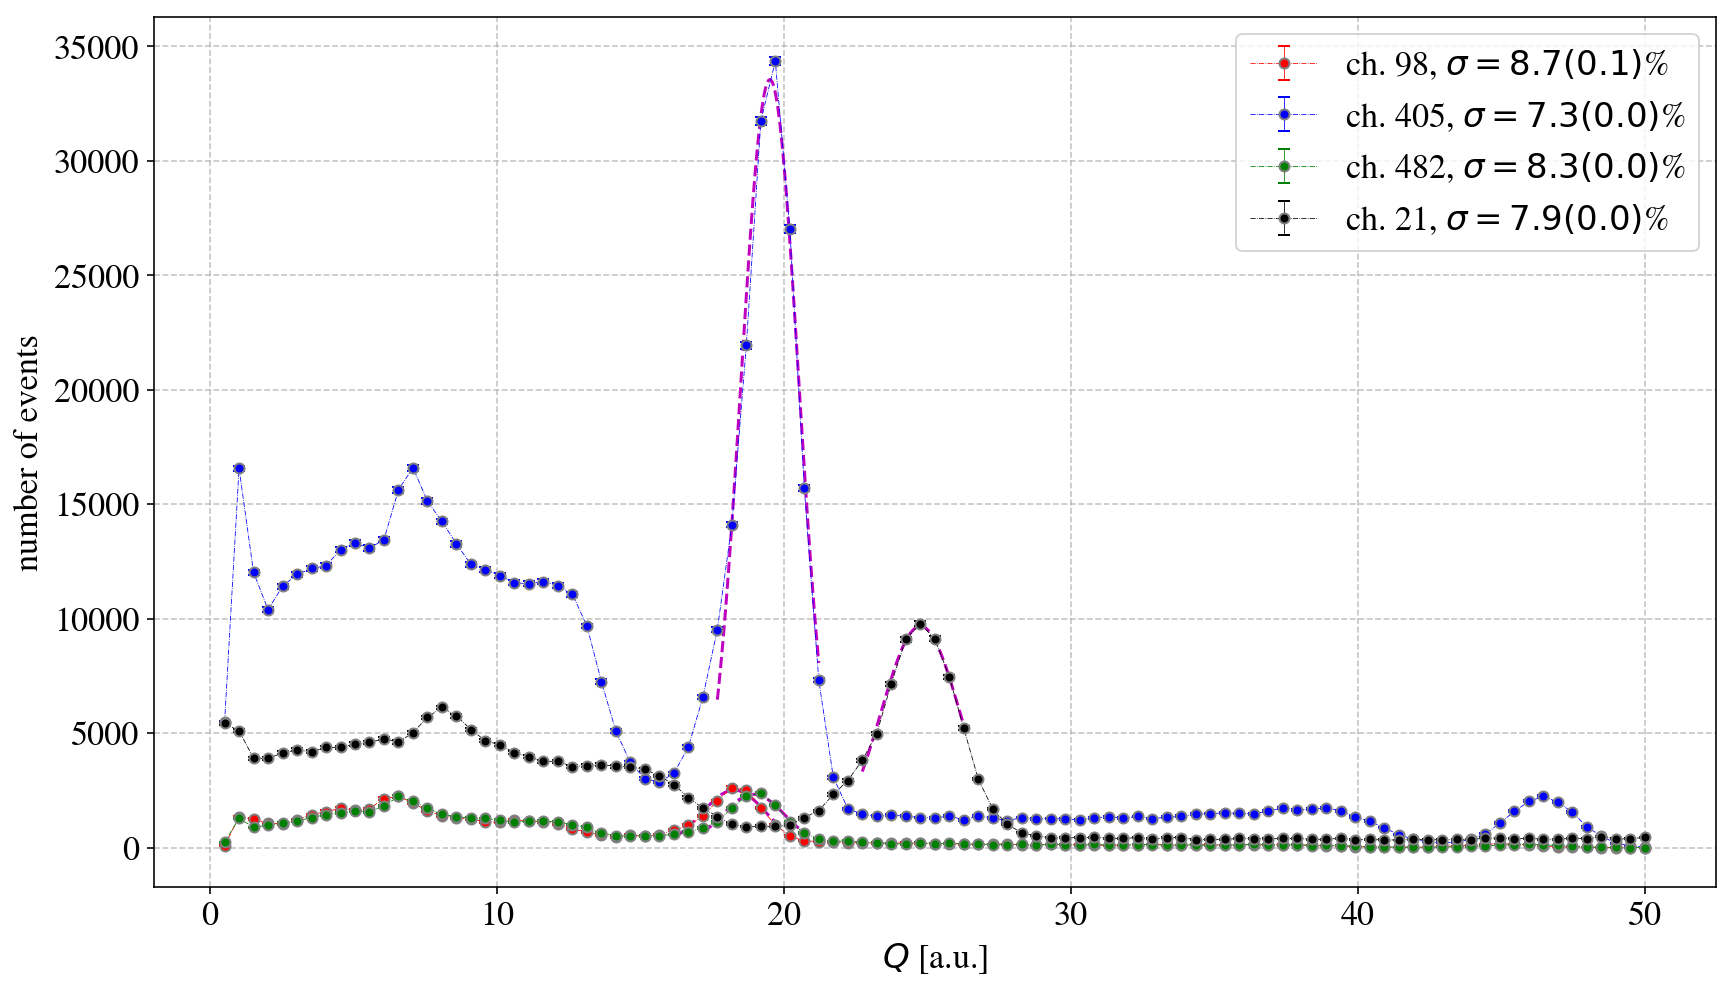

In [9]:
x = bins[1:]
SignalColors = dict(); 
colors = ['red','blue','green','black','purple']
fig=plt.figure(figsize=(14,8));
ax=fig.add_subplot(1,1,1); 
for ch,color in zip(SignalChannels,colors):
    
    # fit a Gaussian around 511 keV peak to estimate energy resolution of the detector
    peakIdx = np.argmax(hSig[ch])
    Q511keV = x[peakIdx]
    print 'Q(511keV):',Q511keV
    if Q511keV>15:
        x2fit = x[peakIdx-4:peakIdx+4]; xfit=np.linspace(np.min(x2fit),np.max(x2fit),100)
        y2fit = hSig[ch][peakIdx-4:peakIdx+4]
        popt,pcov = curve_fit(gaus,x2fit,y2fit,p0=[hSig[ch][peakIdx],x[peakIdx],5])
        plt.plot(xfit,gaus(xfit,*popt),'--m')
        rel_sigma = np.abs(popt[2]/popt[1])
        rel_sigma_err = rel_sigma*np.sqrt(np.square(pcov[2,2]/popt[2])+np.square(pcov[1,1]/popt[1]))
        plt.errorbar( x, hSig[ch], hSig_err[ch] ,linewidth=0.4,marker='o',markersize=5,
                 linestyle='-.',color=color,markeredgecolor='grey',
                 capthick=1,capsize=3 ,
                 label='ch. %d'%(ch)+', $\sigma=%.1f(%.1f)$'%(100.*rel_sigma,100.*rel_sigma_err) + '%');

        
set_axes(ax=ax,x_label='$Q$ [a.u.]',y_label='number of events',
             fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='best');
    
save_figure(filename = main_figures_path + 'p1_22Na_singles_DeltaQ.pdf')

## coincidence

In [10]:
# dT_Na22 = 1800 + 3600
# Na22_coinc_1 = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC/Na22_source_1800sec_coinc.dat',
#                            delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])
# Na22_coinc_2 = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC/Na22_source_3600sec_coinc.dat',
#                            delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])
# Na22_coinc = pd.concat([Na22_coinc_1,Na22_coinc_2])
# Na22_coinc = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC/Na22_source_1800sec_coinc.dat',
#                            delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])
dT_Na22 = 1800
Na22_coinc = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC_4Nov2020/Na22_source_%dsec_coinc.dat'%dT_Na22,
                         delimiter='\t',
                         names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])

In [11]:
# Seperate SiPM pairs
ch_ids1 = np.unique(Na22_coinc.ch1)
ch_ids2 = np.unique(Na22_coinc.ch2)
print 'detected events in the following channels:'
print 'id1:',ch_ids1,'id2:',ch_ids2
Na22_coinc_pairs = dict()
for ch1 in ch_ids1:
    for ch2 in ch_ids2:
        Na22_coinc_pairs[('%d & %d'%(ch1,ch2))] = Na22_coinc[(Na22_coinc.ch1==ch1)&(Na22_coinc.ch2==ch2)]
        
print 'done pairing'
for key in Na22_coinc_pairs.keys():
    print 'channels ',key,':', len(Na22_coinc_pairs[key]), 'events'

detected events in the following channels:
id1: [405 482] id2: [ 21  98 226]
done pairing
channels  482 & 98 : 61 events
channels  405 & 226 : 342 events
channels  482 & 226 : 145 events
channels  405 & 21 : 2231 events
channels  482 & 21 : 269 events
channels  405 & 98 : 537 events


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/time_difference_between_SiPMs.pdf


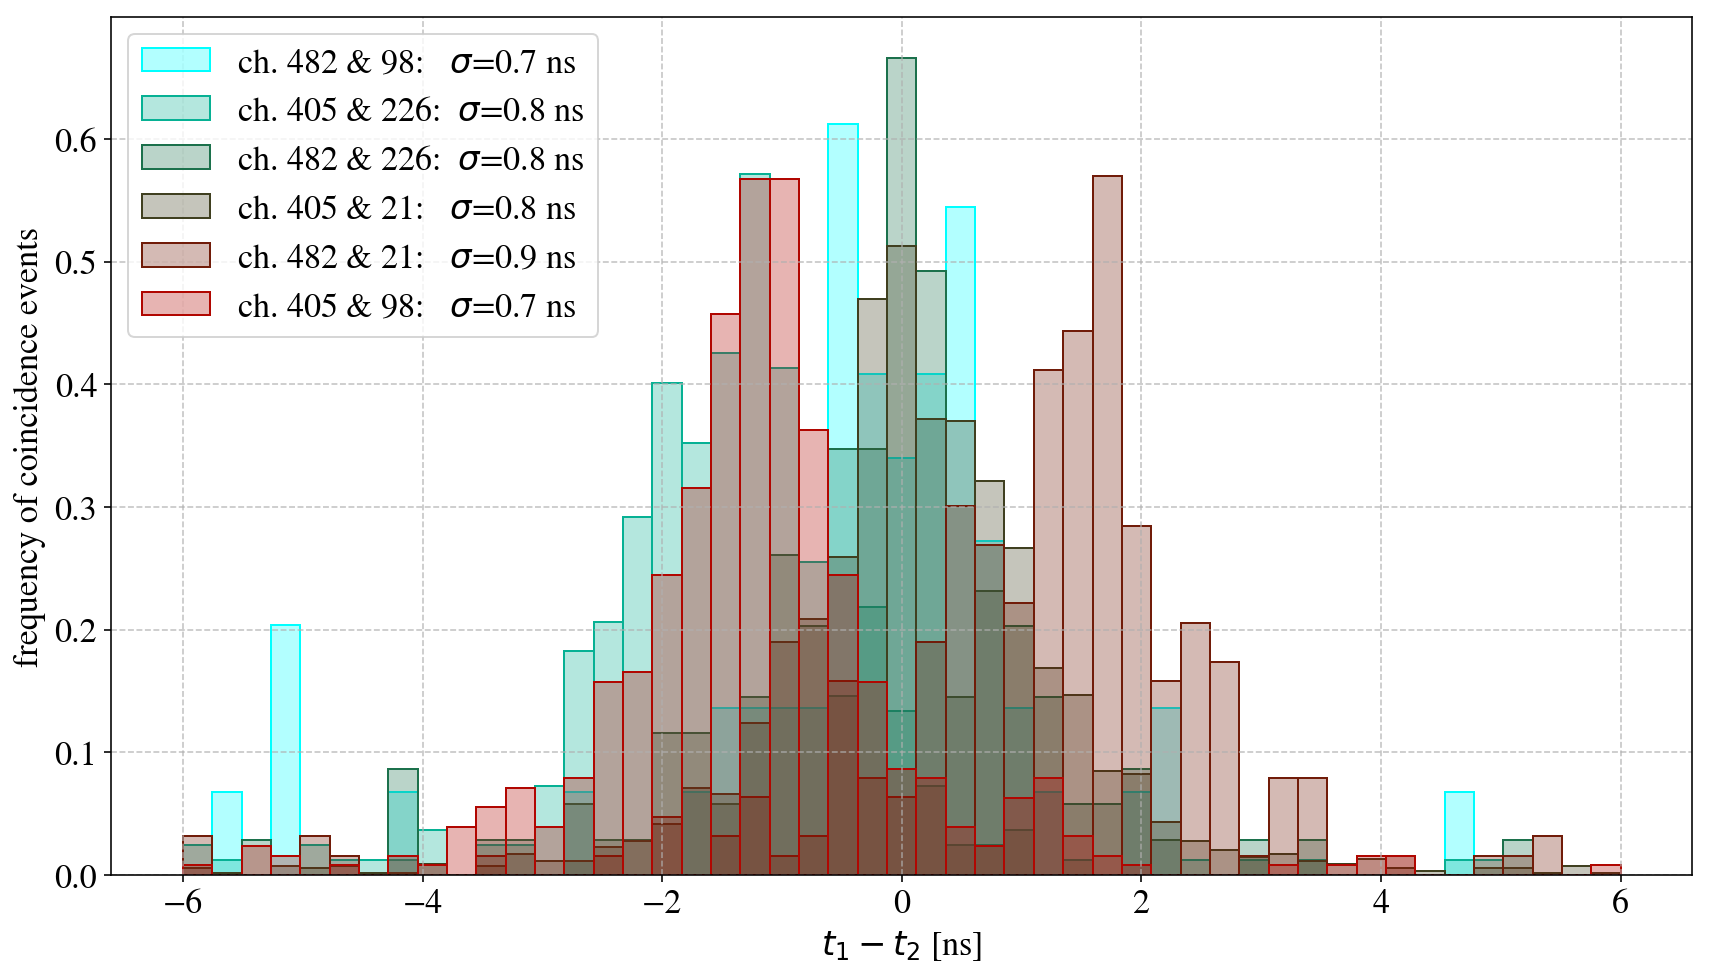

In [12]:
keys=Na22_coinc_pairs.keys()
Npairs = len(keys)
mean_dt,std_dt = dict(),dict()

bins = np.linspace(-6,6,50);
fig,ax=plt.subplots(figsize=(12,7));
keyIdx = 0
for i,key in zip(np.arange(Npairs),keys):
    Na22coinc = Na22_coinc_pairs[key];
    dt = (Na22coinc.t1-Na22coinc.t2)/1.e3;
    dt_reduced = dt[np.abs(dt-np.mean(dt))<2]
    mean_dt[key],std_dt[key] = np.mean(dt_reduced), np.std(dt_reduced)    
    
    f = float(i)/Npairs
    color = [np.square(f), np.square(1-f), np.power(1-f,3)]
    plt.hist(dt,bins=bins, density=True,fc=(color[0],color[1],color[2], 0.3),edgecolor=color,
         label='ch. %s:\t$\sigma$=%.1f ns'%(key,std_dt[key]));    
    
set_axes(ax=ax,x_label='$t_1 - t_2$ [ns]',y_label='frequency of coincidence events',
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='upper left');

plt.tight_layout()
save_figure(filename = main_figures_path + 'time_difference_between_SiPMs.pdf')

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/dt_vs_RdeltaQ.pdf


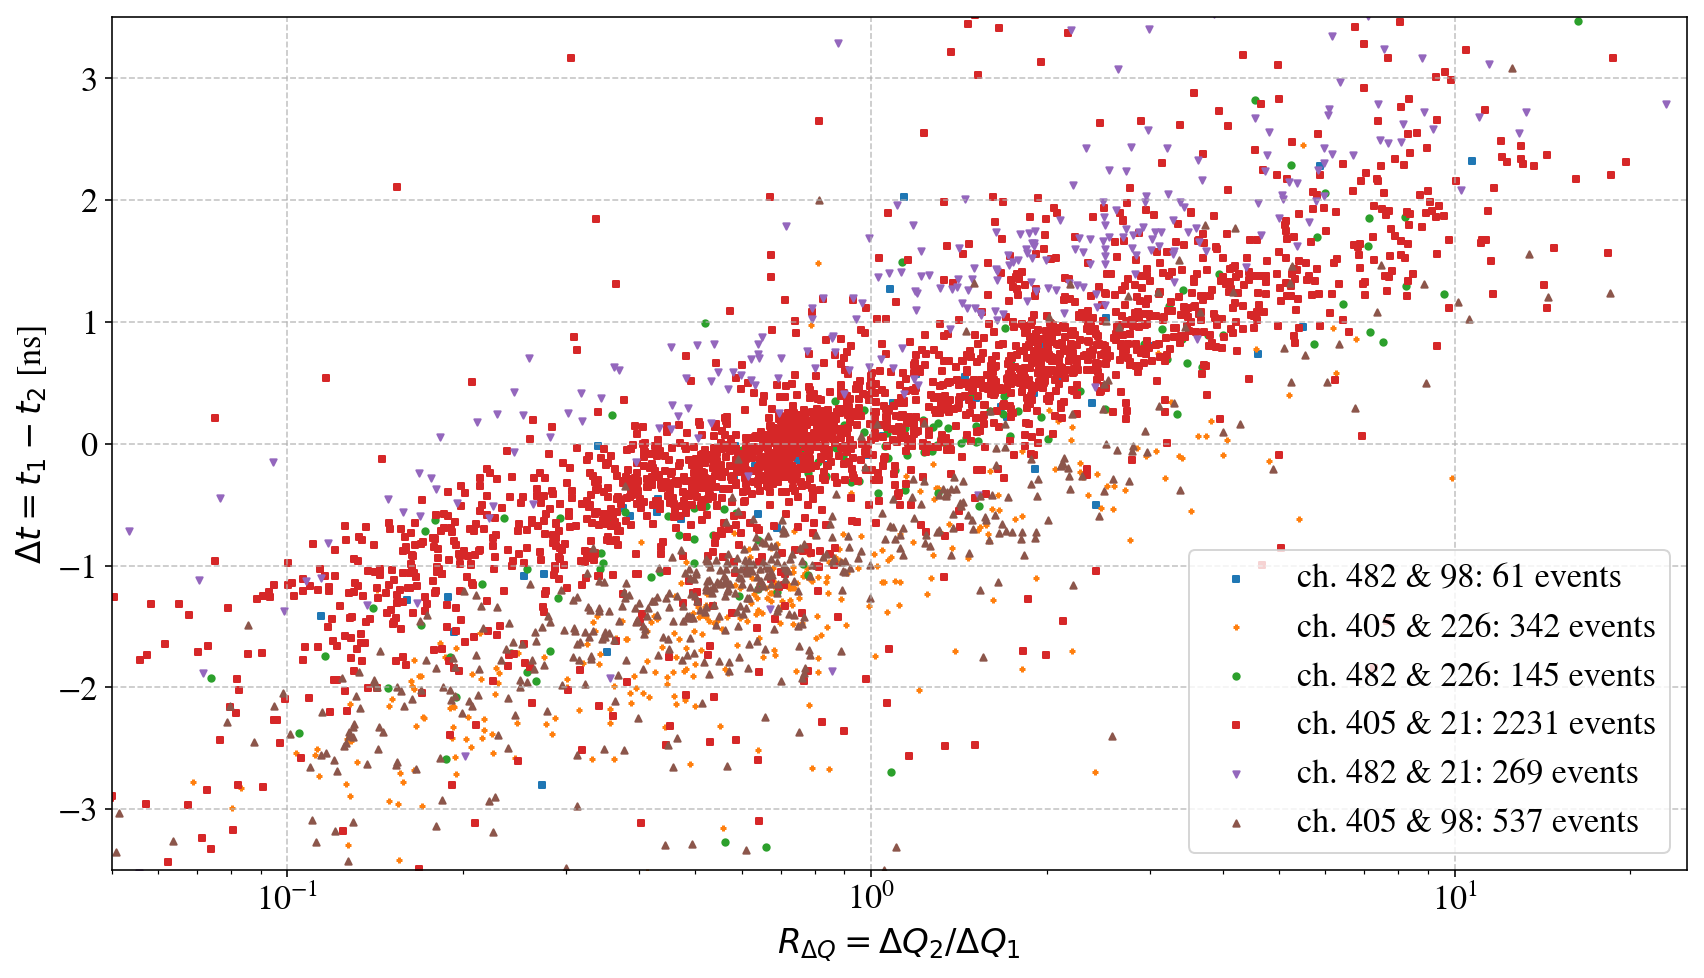

In [13]:
fig,ax=plt.subplots(figsize=(12,7));

markers = [',','+','o','s','v','^',',','+']
for key,marker in zip(Na22_coinc_pairs.keys(),markers):
    Na22_coinc = Na22_coinc_pairs[key];
    dt = (Na22_coinc.t1-Na22_coinc.t2)*1.e-3;
    # deposited charge ratio
    R = Na22_coinc.Q2/Na22_coinc.Q1;
    plt.scatter(R,dt,marker=marker,s=10,
             label='ch. %s: %d events'%(key,len(Na22_coinc)));
    
set_axes(ax=ax,
         x_label='$R_{\Delta Q} = \Delta Q_2/\Delta Q_1$',xlim=(0.05,25),
         y_label='$\Delta t = t_1 - t_2$ [ns]',ylim=(-3.5,3.5),
         fontsize=17,do_add_grid=True,do_add_legend=True);
ax.set_xscale('log')
ax.set_yscale('linear')
plt.tight_layout()
save_figure(filename = main_figures_path + 'dt_vs_RdeltaQ.pdf')

### gamma coincidence in the 511 keV peak: only two SiPMS 
repeat with very long exposure, of 2 hours (3 minutes of evaluation Kit x 60)

In [435]:
data_path = '/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC_8Nov2020/'
dT_Na22 = 7200.0 # sec
Na22_singles = pd.read_csv(data_path+'Na22_sandwitch_%d_sec_single.dat'%dT_Na22,delimiter='\t',names=['time','charge','channel'])
Na22_coinc = pd.read_csv(data_path+'Na22_sandwitch_%d_sec_coinc.dat'%dT_Na22,delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])

dT_Bkg = 500.0 # sec
Bkg_singles = pd.read_csv(data_path+'background_%d_sec_single.dat'%dT_Bkg,delimiter='\t',names=['time','charge','channel'])
Bkg_coinc = pd.read_csv(data_path+'background_%d_sec_coinc.dat'%dT_Bkg,delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])
print('done.')

done.


In [464]:
channels = np.unique(Na22_singles.channel)
print 'detected events in the following channels: ',channels
Na22singles,Bkgsingles = dict(),dict()
hSigBkg,hBkg,hSig,hSig_err = dict(),dict(),dict(),dict()
hSigBkg_coinc,hBkg_coinc,hSig_coinc,hSig_coinc_err = dict(),dict(),dict(),dict()
bins=np.linspace(0,58,150); x = bins[1:]
# singles
for ch,chIdx in zip(channels,[1,2]):    
    Na22singles[ch] = Na22_singles[Na22_singles.channel==ch]    
    Bkgsingles[ch] = Bkg_singles[Bkg_singles.channel==ch]    
        
    hSigBkg[ch],edges = np.histogram(lineariseChargeDeposited(Na22singles[ch].charge),bins=bins);
    hBkg[ch],edges = np.histogram(lineariseChargeDeposited(Bkgsingles[ch].charge),bins=bins);
    # signal
    hSig[ch] = np.array(hSigBkg[ch] - hBkg[ch]*(dT_Na22/dT_Bkg))
    hSig_err[ch] = np.sqrt( np.array(hSigBkg[ch] + hBkg[ch]*(dT_Na22/dT_Bkg)))     
    
    print 'singles:'
    print 'channel', ch,':',float(len(Bkgsingles[ch]))/dT_Bkg, 'events/sec in bkg, ',float(len(Na22singles[ch]))/dT_Na22,'events/sec in sig+bkg'

    # coincidence
    hSigBkg_coinc[ch],edges = np.histogram(lineariseChargeDeposited(Na22_coinc['Q%d'%chIdx]),bins=bins);
    hBkg_coinc[ch],edges = np.histogram(lineariseChargeDeposited(Bkg_coinc['Q%d'%chIdx]),bins=bins);
    hSig_coinc[ch] = np.array(hSigBkg_coinc[ch] - hBkg_coinc[ch]*(dT_Na22/dT_Bkg))
    hSig_coinc_err[ch] = np.sqrt( np.array(hSigBkg_coinc[ch] + hBkg_coinc[ch]*(dT_Na22/dT_Bkg)))     


print 'coincindence:'
print len(Na22_coinc),'total coincidece events'
print float(len(Bkg_coinc))/dT_Bkg,'+/-',np.sqrt(len(Bkg_coinc))/dT_Bkg ,'events/sec in bkg, ',float(len(Na22_coinc))/dT_Na22,'+/-',np.sqrt(len(Na22_coinc))/dT_Na22 ,'events/sec in sig+bkg'
print 'done grouping'

detected events in the following channels:  [482 610]
singles:
channel 482 : 12.944 events/sec in bkg,  467.98875 events/sec in sig+bkg
singles:
channel 610 : 12.982 events/sec in bkg,  420.212222222 events/sec in sig+bkg
coincindence:
50078 total coincidece events
0.398 +/- 0.02821347195933177 events/sec in bkg,  6.95527777778 +/- 0.031080714317227906 events/sec in sig+bkg
done grouping


In [437]:
# calibrate charge to energy
from scipy.signal import find_peaks
peaks_sing,peaks_coinc = dict(),dict()
Epoly,x_keV = dict(),dict()
for ch in channels:
    peaks_sing[ch],tmp = find_peaks(hSig[ch][1:-1],prominence=(5e3, None))
    print 'peaks at bins number',peaks_sing[ch]    
    # backscattering at 255.5 keV, back-to-back at 511 keV, de-excitation gamma at 1274.5
    Q_au = np.array(x[peaks_sing[ch][2:]])
    E_keV = np.array([511,1274.5])
    popt = np.polyfit( Q_au, E_keV , 1 )
    Epoly[ch] = np.poly1d(popt)
    x_keV[ch] = Epoly[ch](x)
    peaks_coinc[ch],tmp = find_peaks(hSig_coinc[ch],prominence=(200, None))

peaks at bins number [  1  17  54 131]
peaks at bins number [  1  17  53 132]


In [438]:
Epoly[Na22_coinc.ch1[0]],Epoly[Na22_coinc.ch2[0]]

(poly1d([ 24.82791357, -10.88607595]), poly1d([ 25.47279445, -34.35714286]))

In [467]:
# time resolution in coincidence photo-peak
Na22_coinc['E1'] = Epoly[Na22_coinc.ch1[0]](Na22_coinc.Q1)
Na22_coinc['E2'] = Epoly[Na22_coinc.ch2[0]](Na22_coinc.Q2)

Bkg_coinc['E1'] = Epoly[Bkg_coinc.ch1[0]](Bkg_coinc.Q1)
Bkg_coinc['E2'] = Epoly[Bkg_coinc.ch2[0]](Bkg_coinc.Q2)

eps_511keV = 100
coinc_511keV = Na22_coinc[(np.abs(Na22_coinc['E1'] - 511)<eps_511keV) & 
                              (np.abs(Na22_coinc['E2'] - 511)<eps_511keV)]
coinc_511keV_Bkg = Bkg_coinc[(np.abs(Bkg_coinc['E1'] - 511)<eps_511keV) & 
                              (np.abs(Bkg_coinc['E2'] - 511)<eps_511keV)]

delta_t = coinc_511keV.t1 - coinc_511keV.t2
sigma = np.std(delta_t[(delta_t-0)<1000])
print 'in 511 keV photo-peak'
print len(coinc_511keV),'events'
print float(len(coinc_511keV_Bkg))/dT_Bkg,'+/-',np.sqrt(len(coinc_511keV_Bkg))/dT_Bkg ,'Hz in bkg'
print float(len(coinc_511keV))/dT_Na22,'+/-',np.sqrt(len(coinc_511keV))/dT_Na22 ,'Hz in sig+bkg'

print 'sigma = ',sigma,'ps'

in 511 keV photo-peak
1181 events
0.002 +/- 0.002 Hz in bkg
0.164027777778 +/- 0.004773011188177662 Hz in sig+bkg
sigma =  781.62829694764 ps


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/p1_22Na_singles_and_coincidence.pdf


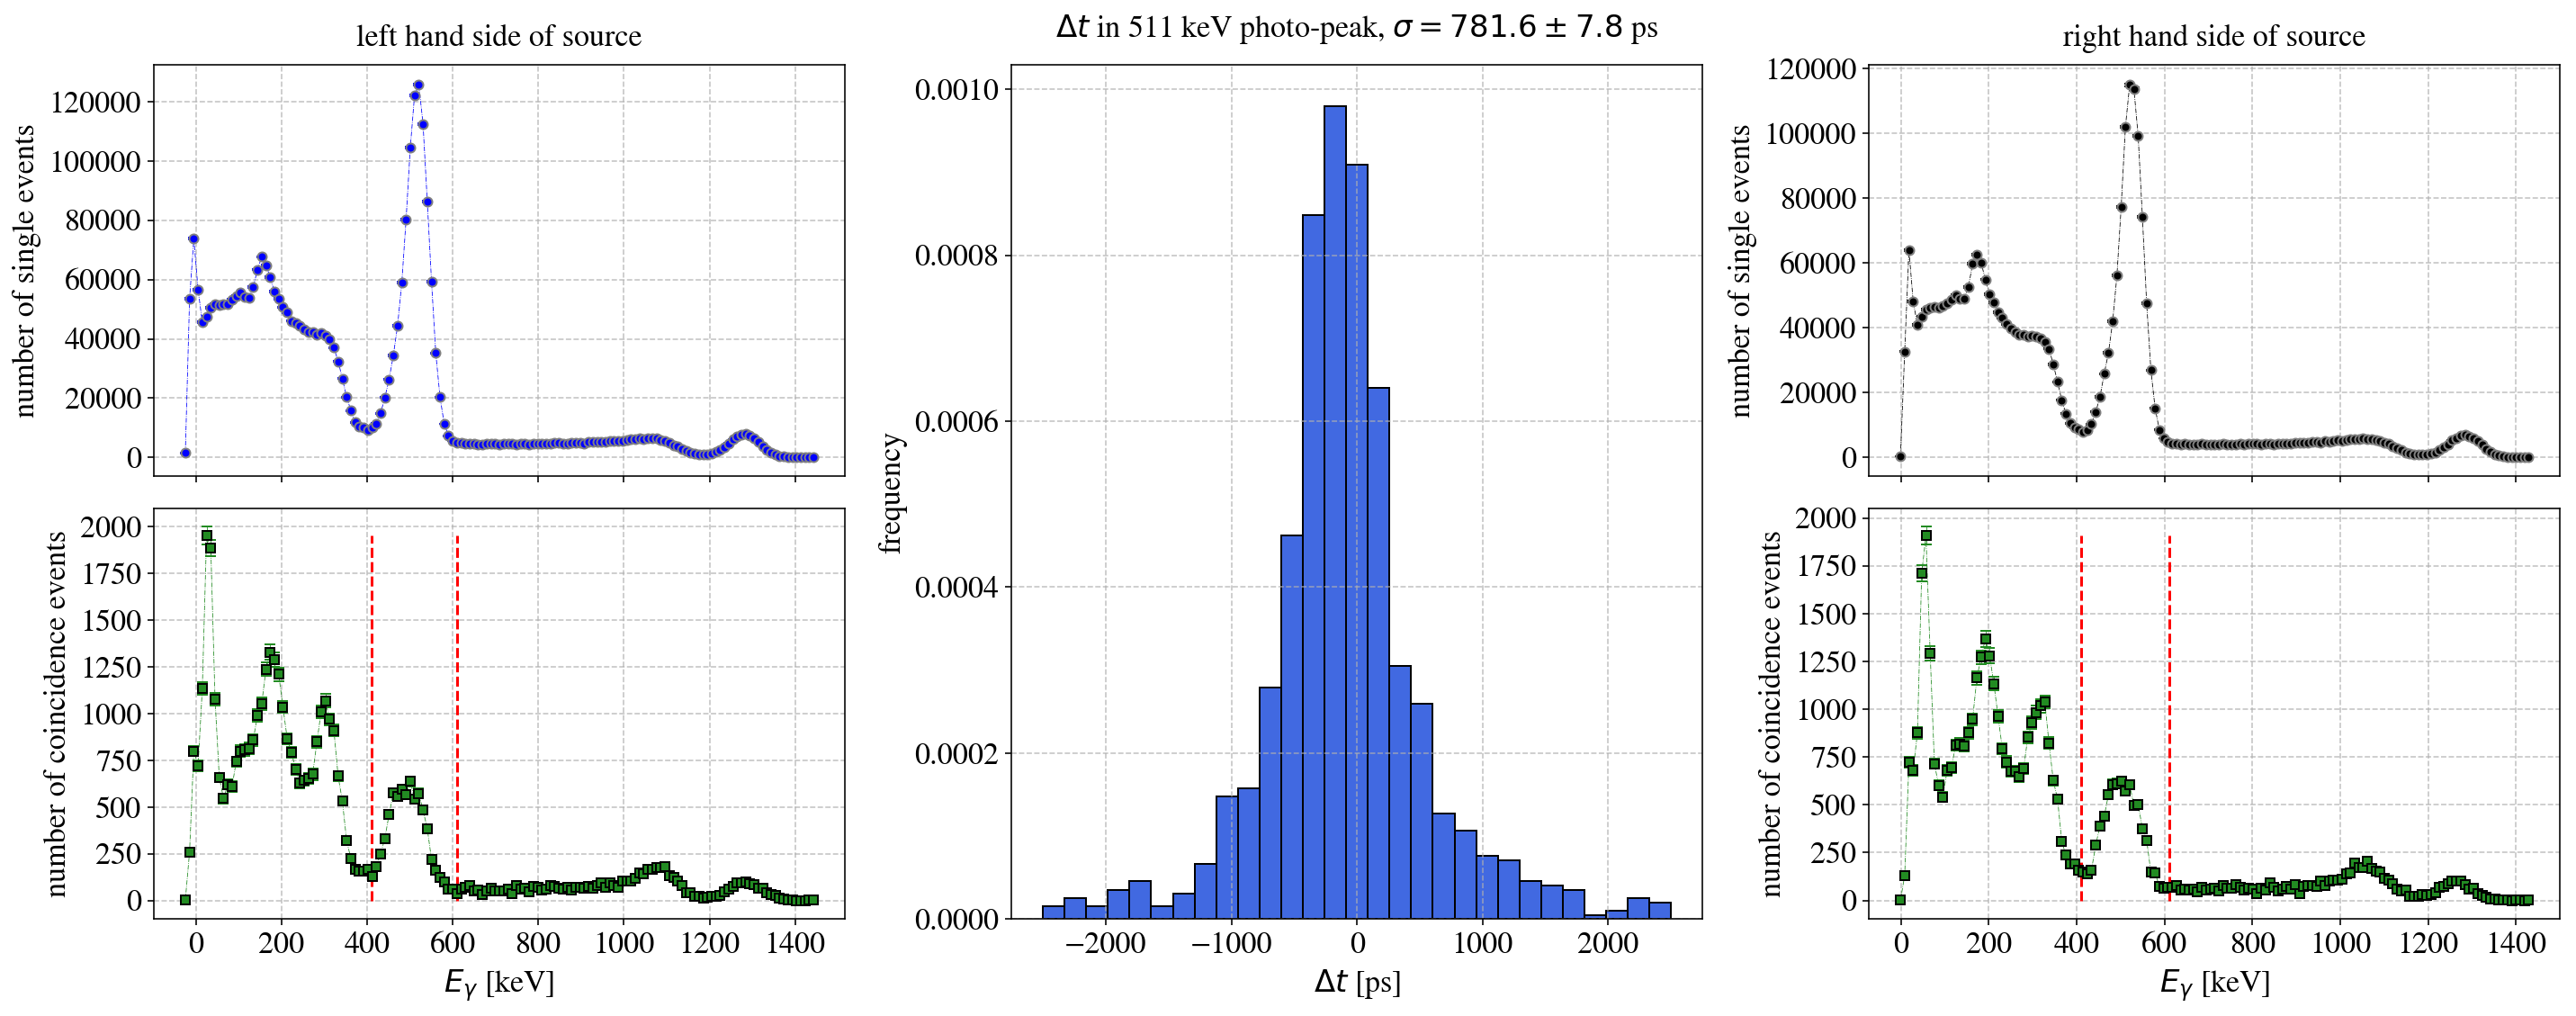

In [468]:
fig=plt.figure(figsize=(20,8));
# singles
for ch,color,subplotIdx,subplotTitle in zip(channels,['blue','black'],[1,3],['left hand side of source','right hand side of source']):
    ax=fig.add_subplot(2,3,subplotIdx)
    # singles charge spectrum
    plt.errorbar( x_keV[ch], hSig[ch], yerr=hSig_err[ch] ,
                 linewidth=0.4,marker='o',markersize=5,
                 linestyle='-.',color=color,markeredgecolor='grey',
                 capthick=1,capsize=3 );        
    # cosmetics
    set_axes(ax=ax,x_label='',y_label='number of single events',remove_ticks_x=True,
             title=subplotTitle,
             fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');

    # coincidence
    ax=fig.add_subplot(2,3,3+subplotIdx)
    plt.errorbar( x_keV[ch], hSig_coinc[ch],  yerr=hSig_coinc_err[ch] ,
                 linewidth=0.4,marker='s',markersize=5,
                 linestyle='-.',color='forestgreen',markeredgecolor='black',
                 capthick=1,capsize=3 );
    plt.plot([511-eps_511keV,511-eps_511keV],[0,np.max(hSig_coinc[ch])],'--r',
             [511+eps_511keV,511+eps_511keV],[0,np.max(hSig_coinc[ch])],'--r')    
    
   # cosmetics
    set_axes(ax=ax,x_label='$E_{\gamma}$ [keV]',y_label='number of coincidence events',
             fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');

ax=fig.add_subplot(1,3,2)
plt.hist(delta_t,bins=np.linspace(-2500,2500,30),edgecolor='k',facecolor='royalblue',normed=1);
# cosmetics
set_axes(ax=ax,x_label='$\Delta t$ [ps]',
         y_label='frequency',
         title='$\Delta t$ in 511 keV photo-peak, $\sigma=%.1f\pm%.1f$ ps'%(sigma,sigma*0.01),
             fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');
     
plt.tight_layout()
save_figure(filename = main_figures_path + 'p1_22Na_singles_and_coincidence.pdf')

### charge deposition correlation

In [441]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, 'lightblue'),
#     (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#fde624'),
    (1, 'red'),
#     (0.8, '#78d151'),
#     (1, '#fde624'),
], N=256)

In [442]:
Q610 = lineariseChargeDeposited(Na22_coinc['Q1'])
E610 = Epoly[610](Q610)
Q482 = lineariseChargeDeposited(Na22_coinc['Q2'])
E482 = Epoly[482](Q482)              

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/p1_22Na_coincidence_Edeposit_correlation.pdf


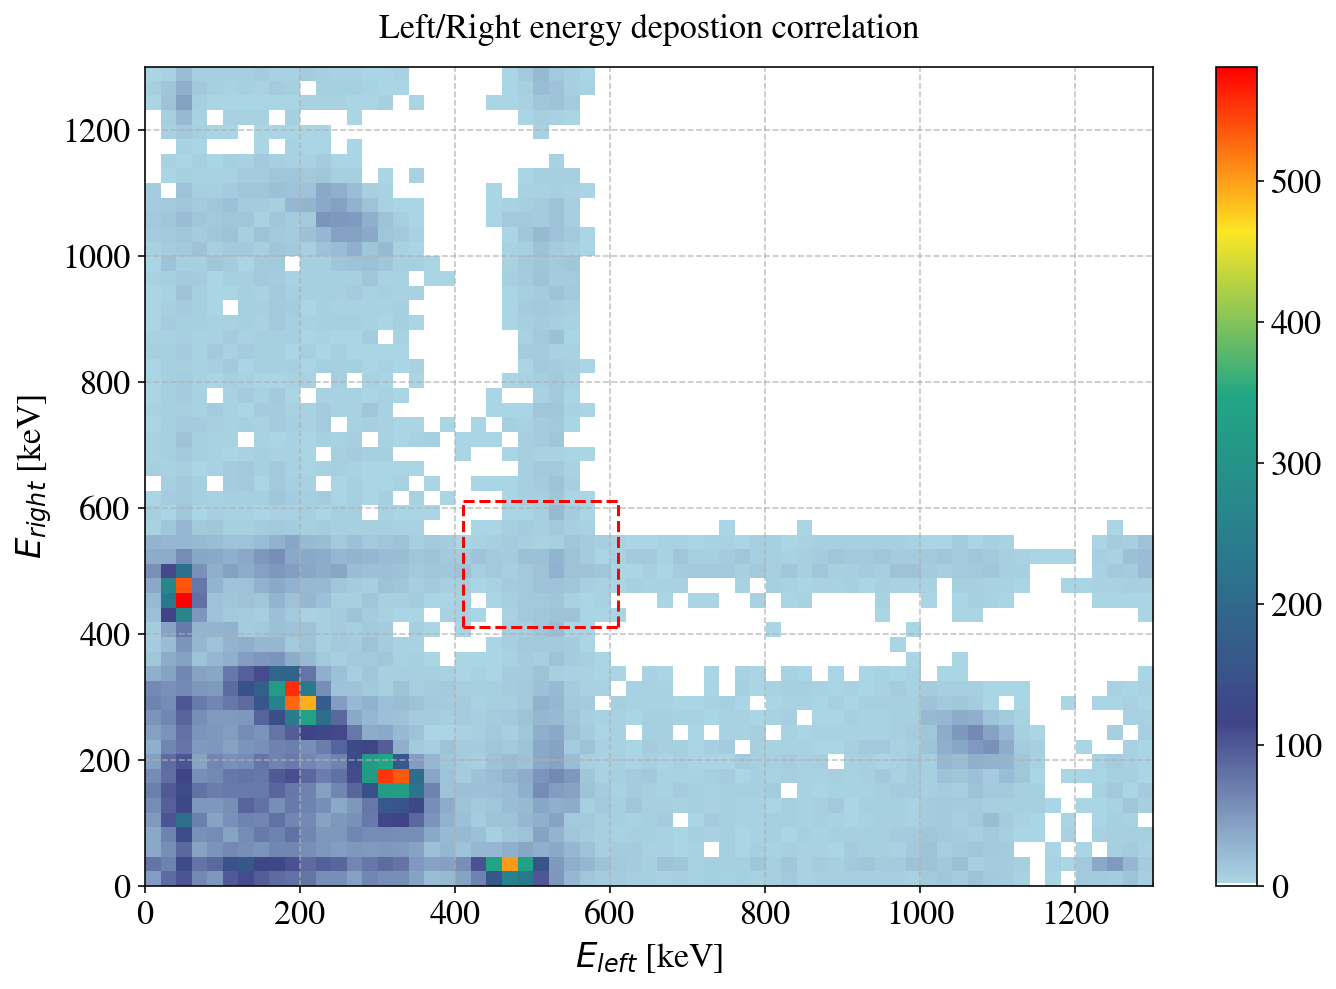

In [459]:
fig = plt.figure(figsize=(10,7));
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(E610, E482,  cmap=white_viridis, dpi=10, downres_factor=20)
cbar=fig.colorbar(density)
cbar.ax.tick_params(labelsize=17) 
plt.plot([511 - eps_511keV,511 - eps_511keV],[511 - eps_511keV,511 + eps_511keV],'--r',[511 - eps_511keV,511 + eps_511keV],[511 - eps_511keV,511 - eps_511keV],'--r',
        [511 + eps_511keV,511 + eps_511keV],[511 - eps_511keV,511 + eps_511keV],'--r',[511 - eps_511keV,511 + eps_511keV],[511 + eps_511keV,511 + eps_511keV],'--r')
set_axes(ax=ax,x_label='$E_{left}$ [keV]',xlim=(0,1300),
         y_label='$E_{right}$ [keV]',ylim=(0,1300),
         title='Left/Right energy depostion correlation',fontsize=17,do_add_grid=True);
plt.tight_layout()
save_figure(filename = main_figures_path + 'p1_22Na_coincidence_Edeposit_correlation.pdf')

### Time resolution in a Compton backscattering ROI

4741 events in ROI ,sigma in ROI =  273.9162760770806 ps

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/p1_22Na_coincEdep_ROI_timeres.pdf


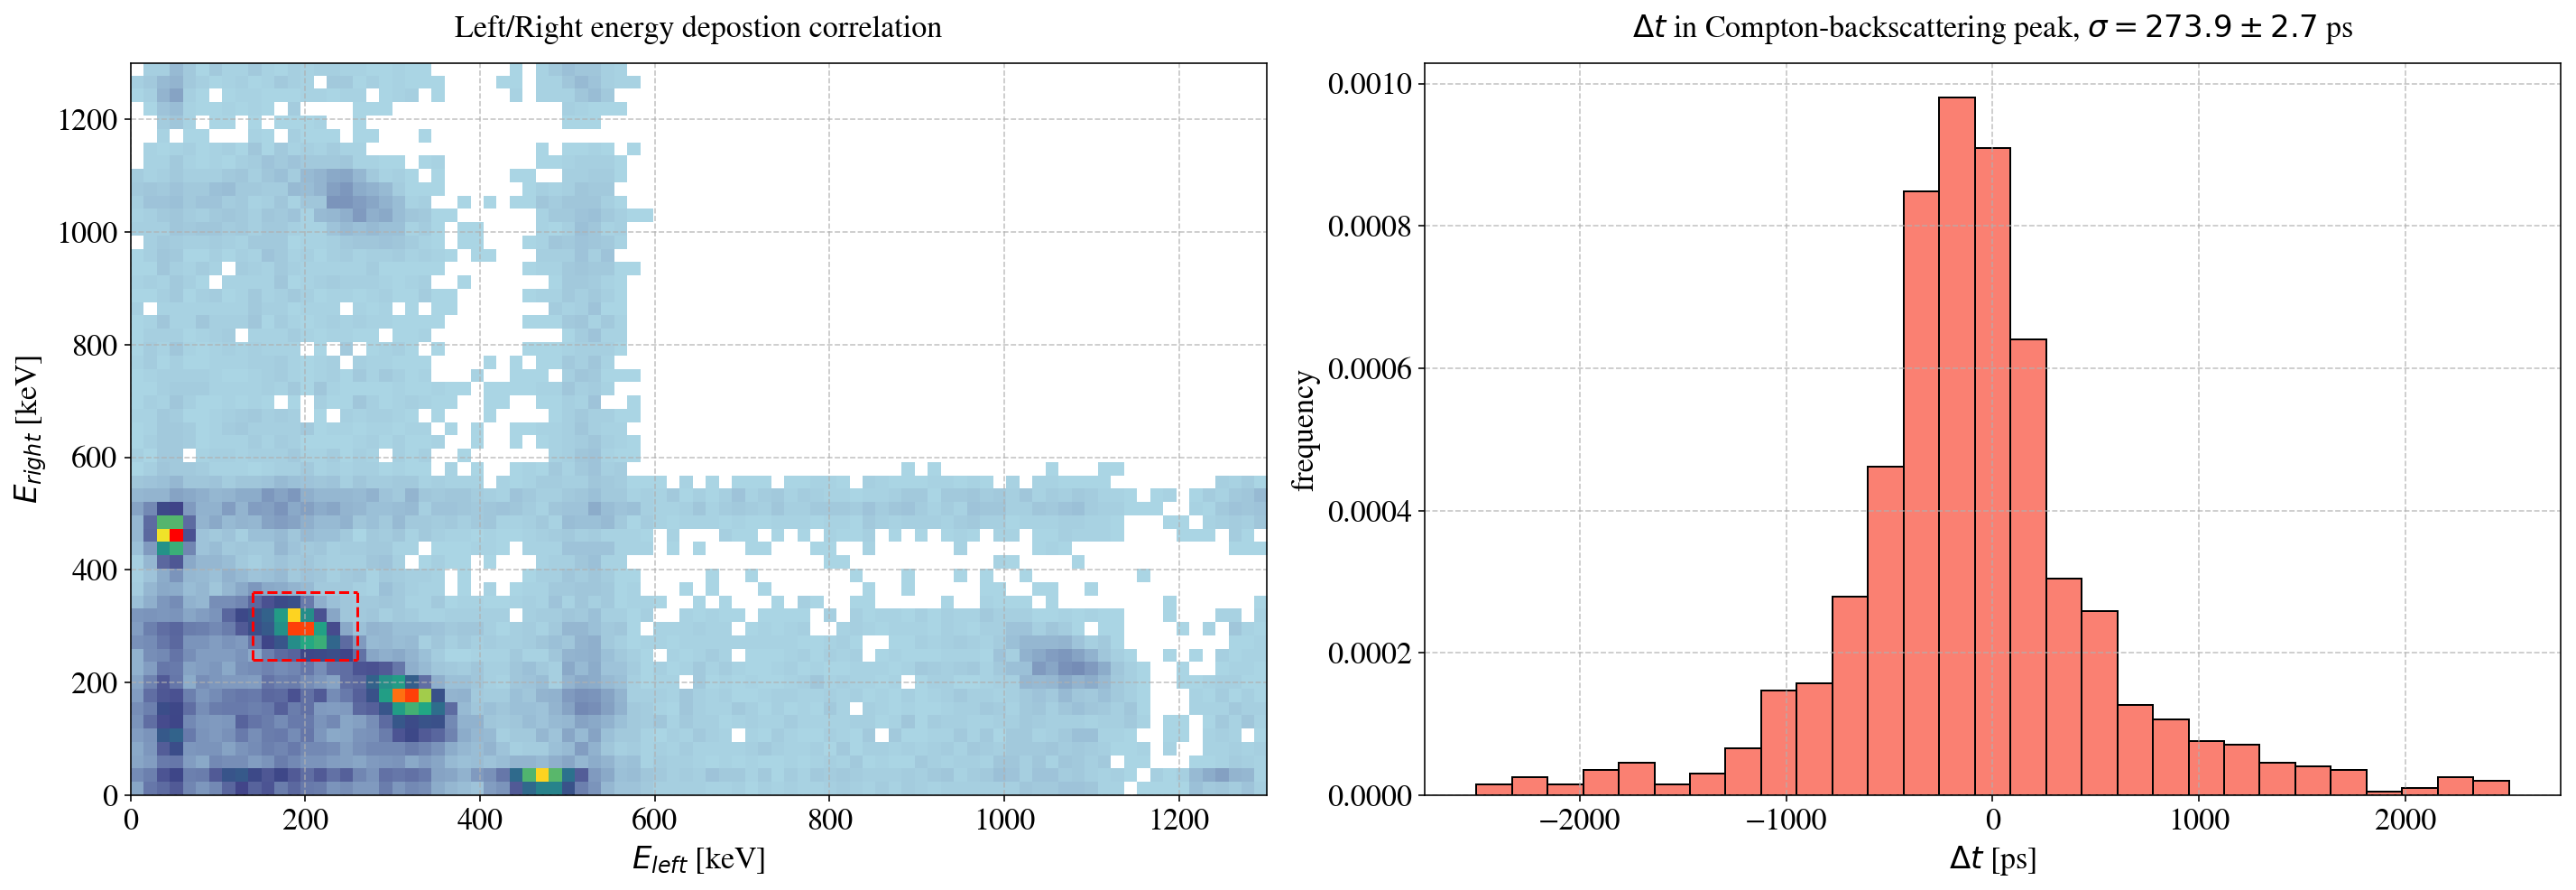

In [461]:
Er_peak = 300;
El_peak = 200;
Etol = 60;
coinc_in_ROI = Na22_coinc[( El_peak - Etol < Na22_coinc['E1'] ) 
                              & ( Na22_coinc['E1'] < El_peak + Etol) 
                              & ( Er_peak - Etol < Na22_coinc['E2'] ) 
                              & ( Na22_coinc['E2'] < Er_peak + Etol) ]
delta_t_in_ROI = coinc_in_ROI.t1 - coinc_in_ROI.t2
sigma_in_ROI = np.std(delta_t_in_ROI[(delta_t_in_ROI-0)<1000])
print len(coinc_in_ROI),'events in ROI',',sigma in ROI = ',sigma_in_ROI,'ps'
print 
fig = plt.figure(figsize=(20,7));
ax = fig.add_subplot(1, 2, 1, projection='scatter_density')
density = ax.scatter_density(E610, E482,  cmap=white_viridis, dpi=10, downres_factor=20)
plt.plot([El_peak - Etol,El_peak - Etol],[Er_peak - Etol,Er_peak + Etol],'--r',[El_peak - Etol,El_peak + Etol],[Er_peak - Etol,Er_peak - Etol],'--r',
        [El_peak + Etol,El_peak + Etol],[Er_peak - Etol,Er_peak + Etol],'--r',[El_peak - Etol,El_peak + Etol],[Er_peak + Etol,Er_peak + Etol],'--r')

set_axes(ax=ax,x_label='$E_{left}$ [keV]',xlim=(0,1300),
         y_label='$E_{right}$ [keV]',ylim=(0,1300),
         title='Left/Right energy depostion correlation',fontsize=17,do_add_grid=True);

ax = fig.add_subplot(1, 2, 2)
plt.hist(delta_t,bins=np.linspace(-2500,2500,30),edgecolor='k',facecolor='salmon',normed=1);
set_axes(ax=ax,x_label='$\Delta t$ [ps]',
         y_label='frequency',
         title='$\Delta t$ in Compton-backscattering peak, $\sigma=%.1f\pm%.1f$ ps'%(sigma_in_ROI,sigma_in_ROI*0.01),
             fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');
plt.tight_layout()
save_figure(filename = main_figures_path + 'p1_22Na_coincEdep_ROI_timeres.pdf')

### Same with the two detectors on the same side of the 22Na source

In [423]:
data_path = '/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC_8Nov2020/'
dT_Na22 = 3600.0 # sec
Na22_singles = pd.read_csv(data_path+'Na22_bothLYSOsOnTheSameSide_%d_sec_single.dat'%dT_Na22,delimiter='\t',names=['time','charge','channel'])
Na22_coinc = pd.read_csv(data_path+'Na22_bothLYSOsOnTheSameSide_%d_sec_coinc.dat'%dT_Na22,delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])

dT_Bkg = 500.0 # sec
Bkg_singles = pd.read_csv(data_path+'background_%d_sec_single.dat'%dT_Bkg,delimiter='\t',names=['time','charge','channel'])
Bkg_coinc = pd.read_csv(data_path+'background_%d_sec_coinc.dat'%dT_Bkg,delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])
print('done.')

done.


In [424]:
bins=np.linspace(0,54,75); x = bins[1:]

channels = np.unique(Na22_singles.channel)
print 'detected events in the following channels: ',channels
Na22singles,Bkgsingles = dict(),dict()
hSigBkg,hBkg,hSig,hSig_err = dict(),dict(),dict(),dict()
hSigBkg_coinc,hBkg_coinc,hSig_coinc,hSig_coinc_err = dict(),dict(),dict(),dict()
# singles
for ch,chIdx in zip(channels,[1,2]):    
    Na22singles[ch] = Na22_singles[Na22_singles.channel==ch]    
    Bkgsingles[ch] = Bkg_singles[Bkg_singles.channel==ch]    
        
    hSigBkg[ch],edges = np.histogram(lineariseChargeDeposited(Na22singles[ch].charge),bins=bins);
    hBkg[ch],edges = np.histogram(lineariseChargeDeposited(Bkgsingles[ch].charge),bins=bins);
    # signal
    hSig[ch] = np.array(hSigBkg[ch] - hBkg[ch]*(dT_Na22/dT_Bkg))
    hSig_err[ch] = np.sqrt( np.array(hSigBkg[ch] + hBkg[ch]*(dT_Na22/dT_Bkg)))     
    
    print 'singles:'
    print 'channel', ch,':',float(len(Bkgsingles[ch]))/dT_Bkg, 'events/sec in bkg, ',float(len(Na22singles[ch]))/dT_Na22,'events/sec in sig+bkg'

    # coincidence
    hSigBkg_coinc[ch],edges = np.histogram(lineariseChargeDeposited(Na22_coinc['Q%d'%chIdx]),bins=bins);
    hBkg_coinc[ch],edges = np.histogram(lineariseChargeDeposited(Bkg_coinc['Q%d'%chIdx]),bins=bins);
    hSig_coinc[ch] = np.array(hSigBkg_coinc[ch] - hBkg_coinc[ch]*(dT_Na22/dT_Bkg))
    hSig_coinc_err[ch] = np.sqrt( np.array(hSigBkg_coinc[ch] + hBkg_coinc[ch]*(dT_Na22/dT_Bkg)))     

    # ADC units to keV
    x_keV[ch] = Epoly[ch](x)

print 'coincindence'
print float(len(Bkg_coinc))/dT_Bkg, 'events/sec in bkg, ',float(len(Na22_coinc))/dT_Na22,'events/sec in sig+bkg'
print 'done grouping'

detected events in the following channels:  [482 610]
singles:
channel 482 : 12.944 events/sec in bkg,  283.448611111 events/sec in sig+bkg
singles:
channel 610 : 12.982 events/sec in bkg,  121.6725 events/sec in sig+bkg
coincindence
0.398 events/sec in bkg,  1.28722222222 events/sec in sig+bkg
done grouping


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/p1_22Na_singles_and_coincidence_bothOnSameSideOfSource.pdf


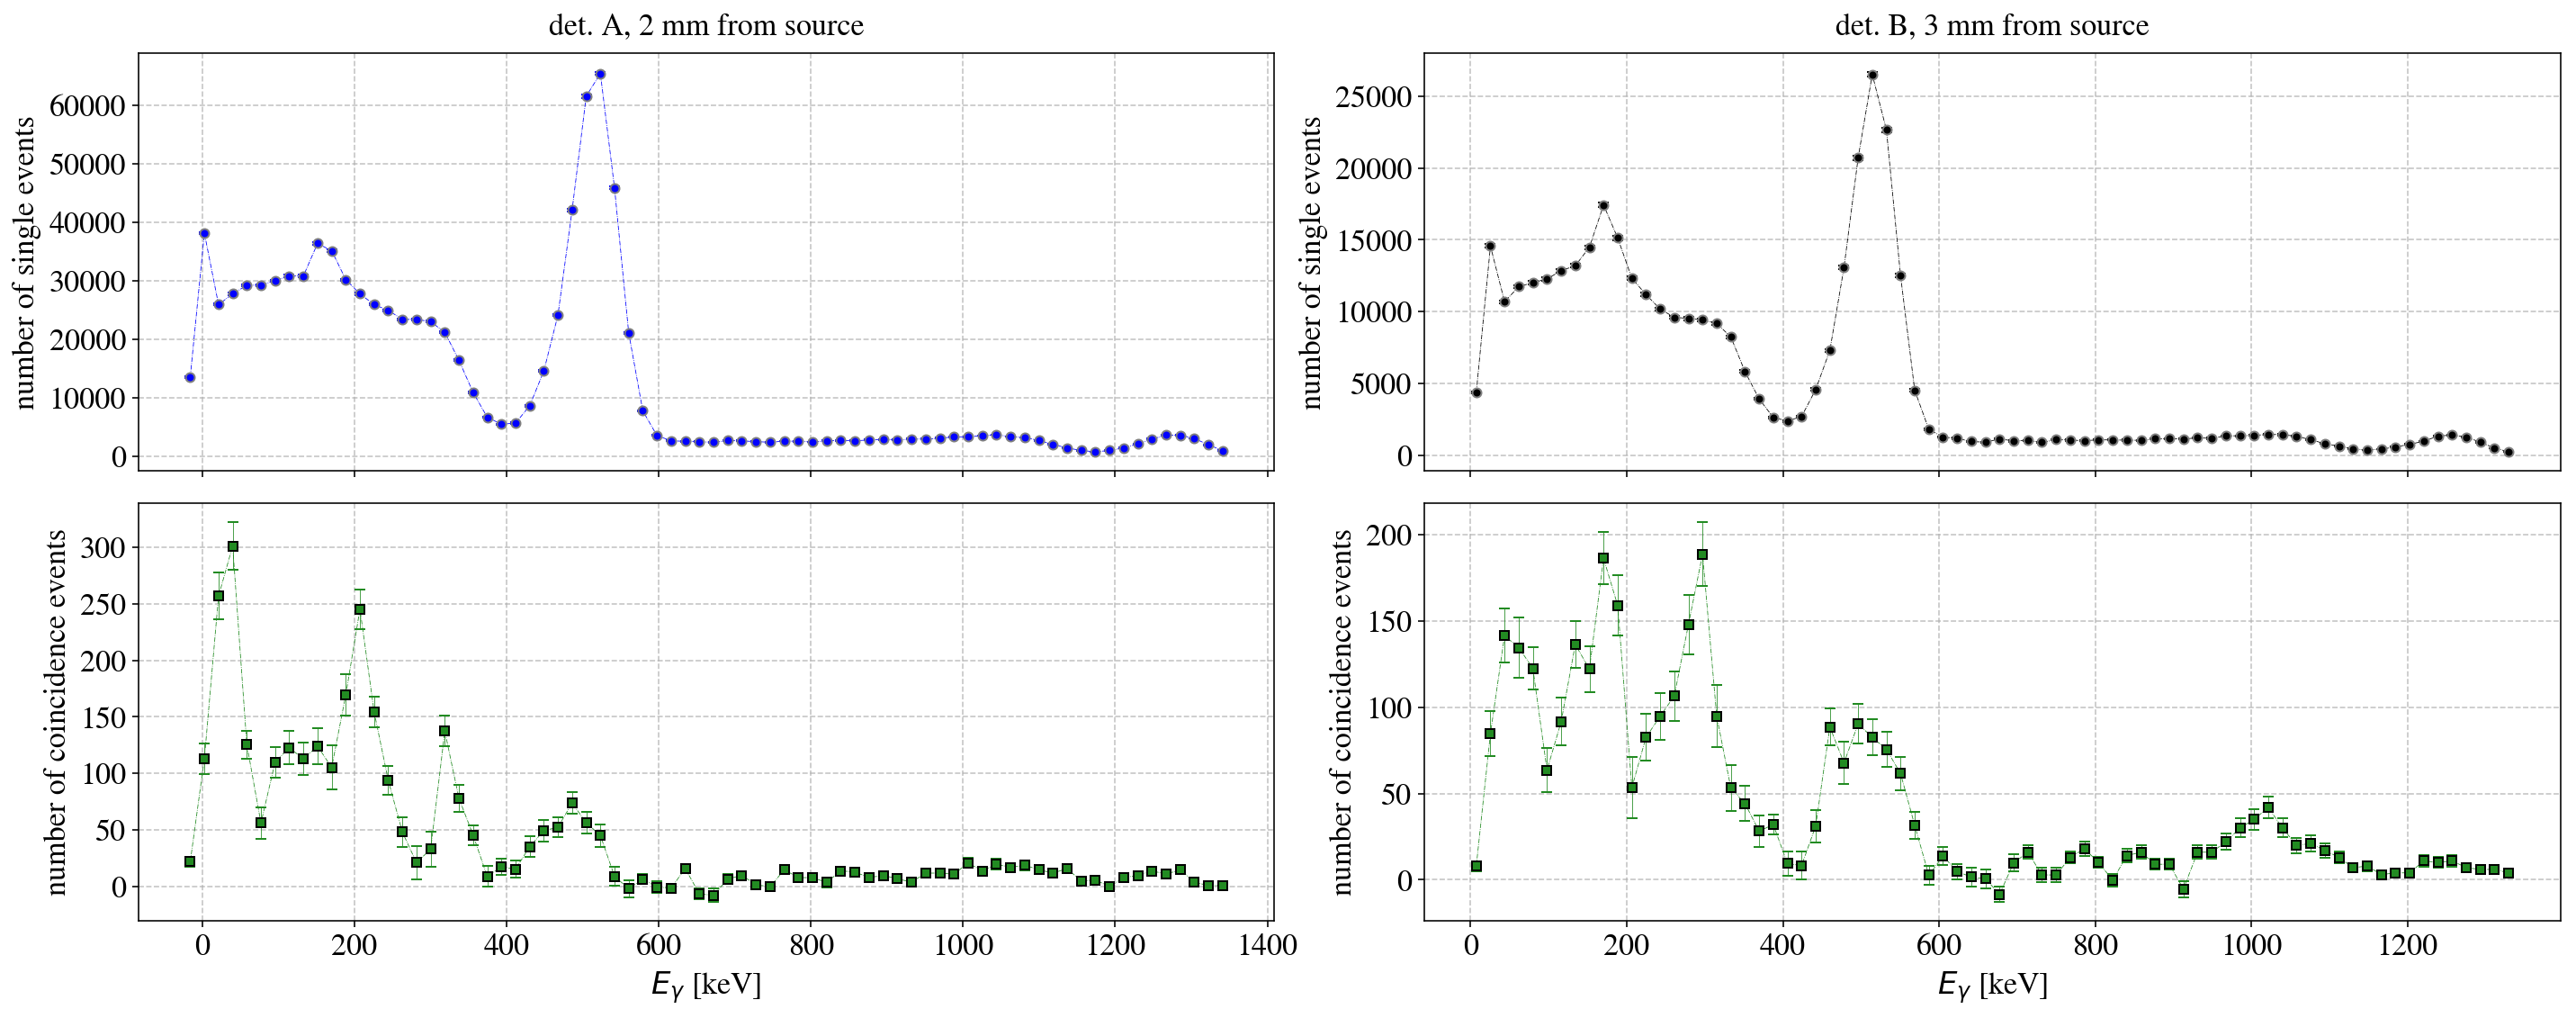

In [425]:
fig=plt.figure(figsize=(20,8));
# singles
for ch,color,subplotIdx,subplotTitle in zip([482,610],
                                            ['blue','black'],
                                            [1,2],
                                            ['det. A, 2 mm from source','det. B, 3 mm from source']):
    ax=fig.add_subplot(2,2,subplotIdx)
    # singles charge spectrum
    plt.errorbar( x_keV[ch], hSig[ch], yerr=hSig_err[ch] ,
                 linewidth=0.4,marker='o',markersize=5,
                 linestyle='-.',color=color,markeredgecolor='grey',
                 capthick=1,capsize=3 );        
    # cosmetics
    set_axes(ax=ax,x_label='',y_label='number of single events',remove_ticks_x=True,
             title=subplotTitle,
             fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');

    # coincidence
    ax=fig.add_subplot(2,2,2+subplotIdx)
    plt.errorbar( x_keV[ch], hSig_coinc[ch],  yerr=hSig_coinc_err[ch] ,
                 linewidth=0.4,marker='s',markersize=5,
                 linestyle='-.',color='forestgreen',markeredgecolor='black',
                 capthick=1,capsize=3 );
   # cosmetics
    set_axes(ax=ax,x_label='$E_{\gamma}$ [keV]',y_label='number of coincidence events',
             fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');

plt.tight_layout()
save_figure(filename = main_figures_path + 'p1_22Na_singles_and_coincidence_bothOnSameSideOfSource.pdf')

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.3/Figures/p1_22Na_coincidence_Edeposit_correlation_bothOnSameSideOfSource.pdf


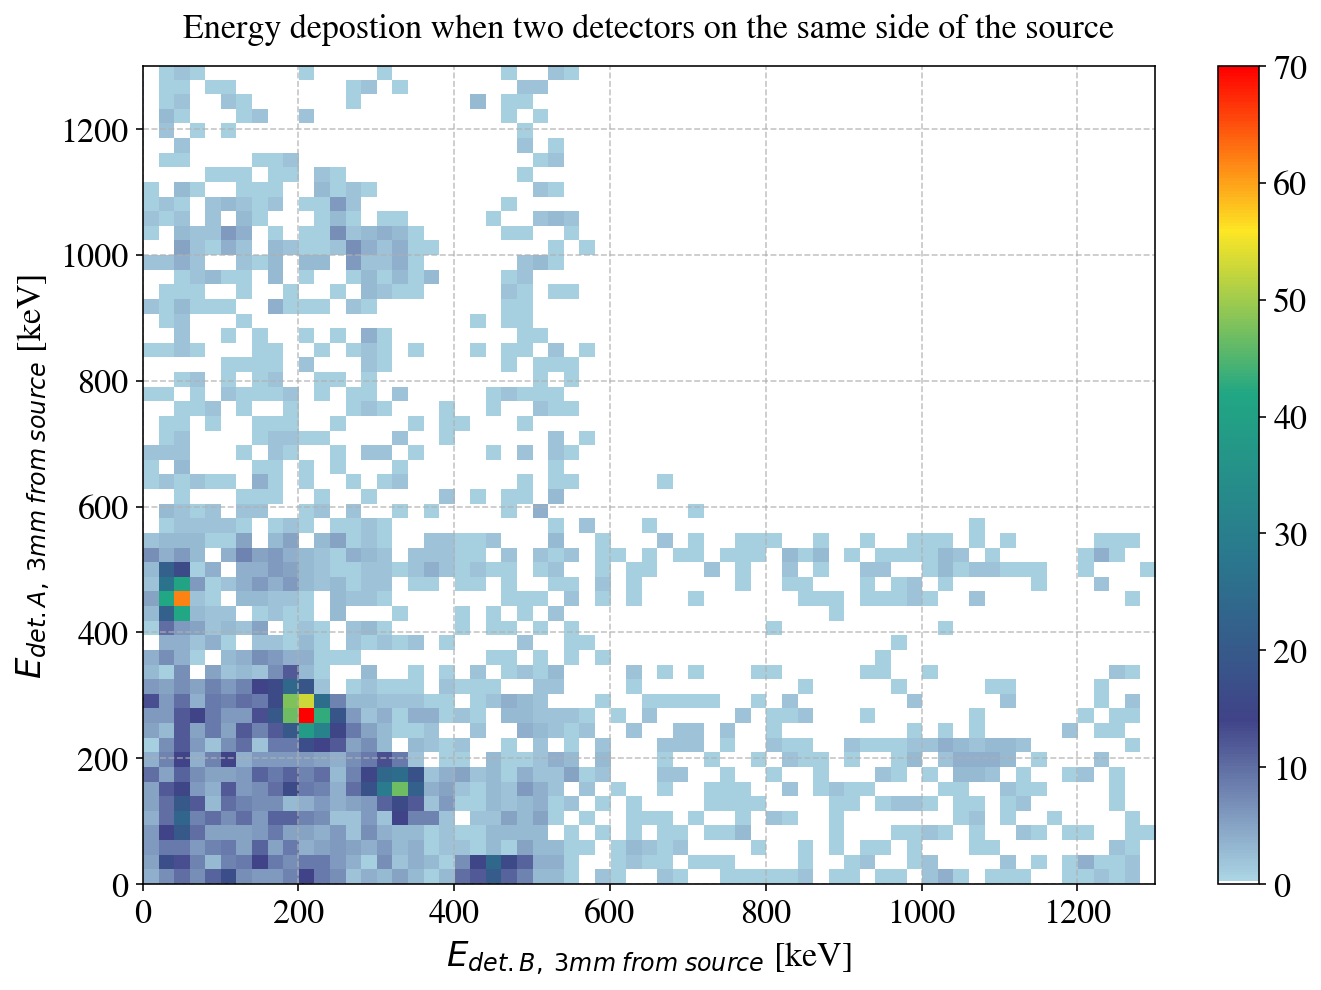

In [431]:
Q610 = lineariseChargeDeposited(Na22_coinc['Q1'])
E610 = Epoly[610](Q610)
Q482 = lineariseChargeDeposited(Na22_coinc['Q2'])
E482 = Epoly[482](Q482)  

fig = plt.figure(figsize=(10,7));
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(E610, E482,  cmap=white_viridis, dpi=10, downres_factor=20)
cbar=fig.colorbar(density)
cbar.ax.tick_params(labelsize=17) 
set_axes(ax=ax,x_label='$E_{det. B, \; 3 mm \; from \; source}$ [keV]',xlim=(0,1300),
         y_label='$E_{det. A, \; 3 mm \; from \; source}$ [keV]',ylim=(0,1300),
         title='Energy depostion when two detectors on the same side of the source',fontsize=17,do_add_grid=True);
plt.tight_layout()
save_figure(filename = main_figures_path + 'p1_22Na_coincidence_Edeposit_correlation_bothOnSameSideOfSource.pdf')

## arxiv

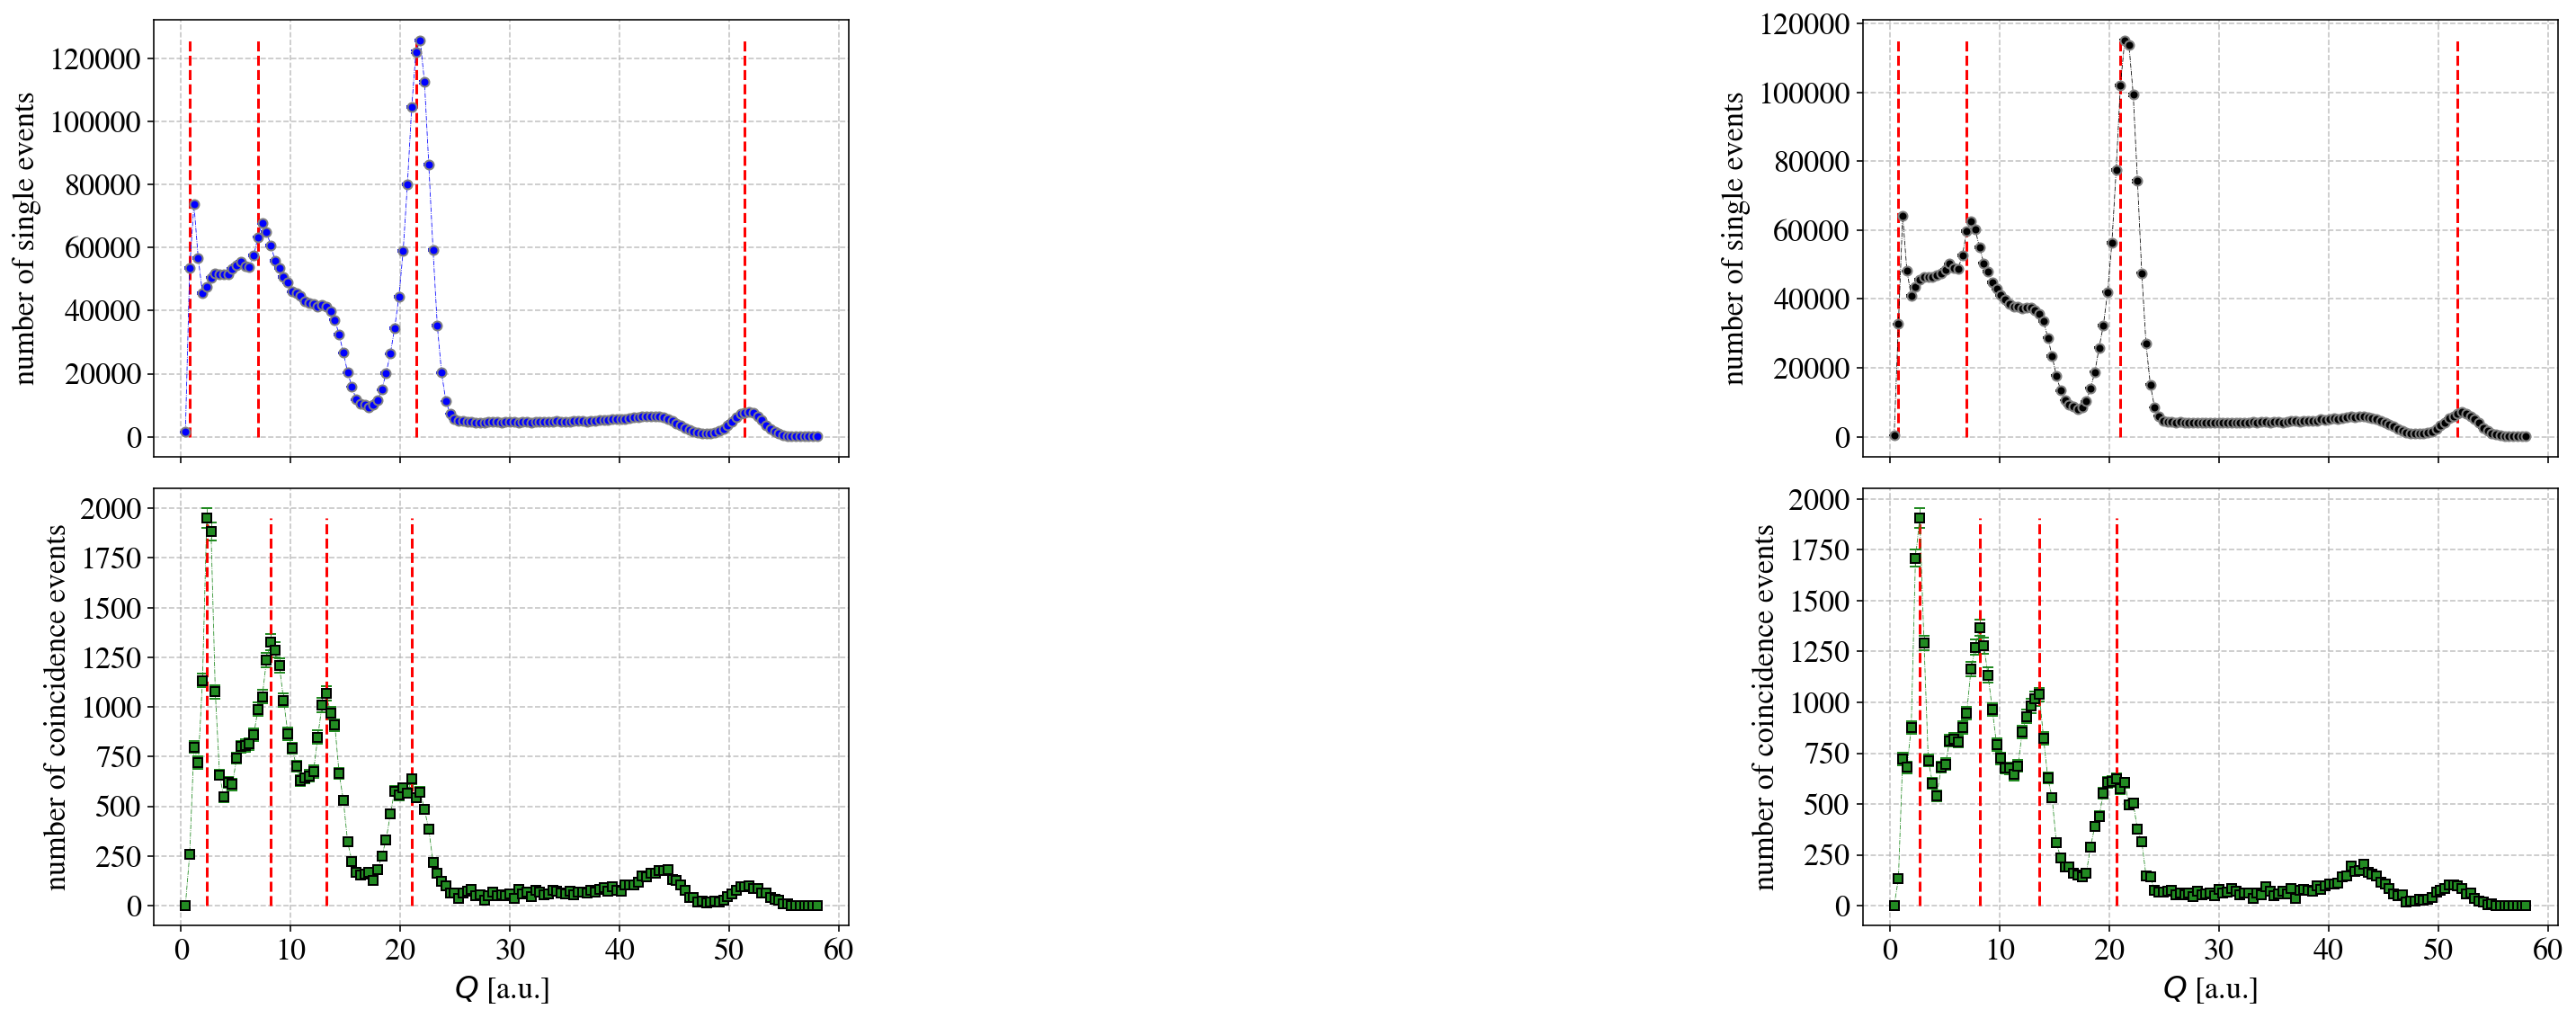

In [145]:
# Na22_coinc = Na22_coinc_pairs['405 & 21'];

# # coincidence
# Q511keV_405 = x[np.argmax(hSig[405])]
# Q511keV_21 = x[np.argmax(hSig[21])]
# Na22_coinc_511keV = Na22_coinc[(np.abs(Na22_coinc.Q1 - Q511keV_405)<3) & (np.abs(Na22_coinc.Q2 - Q511keV_21)<3)]
# delta_t = Na22_coinc_511keV.t1 - Na22_coinc_511keV.t2;

do_show_peaks = True
# CONTINUE HERE!!!!!!!!
fig=plt.figure(figsize=(20,8));
# singles
for ch,color,subplotIdx in zip(channels,['blue','black'],[1,3]):
    ax=fig.add_subplot(2,3,subplotIdx)
    # singles charge spectrum
    plt.errorbar( x, hSig[ch], yerr=hSig_err[ch] ,
                 linewidth=0.4,marker='o',markersize=5,
                 linestyle='-.',color=color,markeredgecolor='grey',
                 capthick=1,capsize=3 );        
    if do_show_peaks:
        for peak in peaks_sing[ch]:
            plt.plot ([x[peak],x[peak]],[0,np.max(hSig[ch])],'--r')
    # cosmetics
    set_axes(ax=ax,x_label='',y_label='number of single events',remove_ticks_x=True,
             fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');
    

    # coincidence
    ax=fig.add_subplot(2,3,3+subplotIdx)
    plt.errorbar( x, hSig_coinc[ch],  yerr=hSig_coinc_err[ch] ,
                 linewidth=0.4,marker='s',markersize=5,
                 linestyle='-.',color='forestgreen',markeredgecolor='black',
                 capthick=1,capsize=3 );        
    if do_show_peaks:
        for peak in peaks_coinc[ch]:
            plt.plot ([x[peak],x[peak]],[0,np.max(hSig_coinc[ch])],'--r')
   # cosmetics
    set_axes(ax=ax,x_label='$Q$ [a.u.]',y_label='number of coincidence events',
             fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');


# ax=fig.add_subplot(1,3,2)
# plt.hist(delta_t,bins=np.linspace(-2000,2000,100),edgecolor='k',facecolor='royalblue',normed=1);
# sigma = np.std(delta_t[(delta_t-0)<1000])
# # cosmetics
# set_axes(ax=ax,x_label='$\Delta t$ [ps]',y_label='number of events',title='$\sigma=%.1f$ ps'%sigma,
#              fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');
     
plt.tight_layout()
# save_figure(filename = main_figures_path + 'p1_22Na_singles_and_coincidence.pdf')